In [1]:
import pypsa

In [2]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline

In [3]:
n = pypsa.Network("results/testLowTheat/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2030.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2030.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


INFO:numexpr.utils:NumExpr defaulting to 6 threads.


(<matplotlib.collections.PatchCollection at 0x7f4afdda4700>,
 <matplotlib.collections.LineCollection at 0x7f4afcc1a1c0>)

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


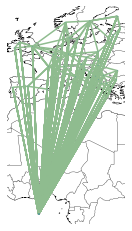

In [4]:
n.plot()

In [5]:
n.objective / 1e9 #billion EUR p.a.

618.0370239493408

In [6]:
import cartopy.crs as ccrs

In [7]:
loading = (n.links_t.p0.abs().mean().sort_index() / (n.links.p_nom_opt*n.links.p_max_pu).sort_index()).fillna(0.)
# PlateCarree, Mercator, Orthographic\n",
notdc_b = n.links.index[n.links.carrier != "DC"]                        
loading[notdc_b] = 0

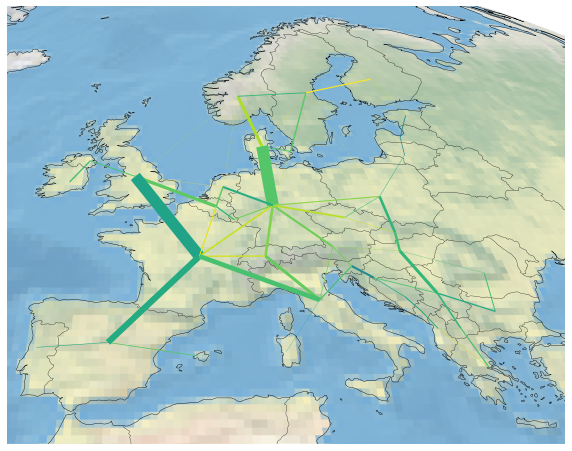

In [8]:
fig,ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.Orthographic()},
    )

dc_b = n.links.index[n.links.carrier == "DC"]
notdc_b = n.links.index[n.links.carrier != "DC"]
n.links.loc[dc_b, "temp"] = n.links.p_nom_opt
n.links.loc[notdc_b, "temp"] = 0
#n.links.temp.fillna(0.01)
    
n.plot(ax=ax,
          bus_colors='gray',
          branch_components=["Link"],
          link_widths=n.links.temp / 5e3,
          link_colors=loading,
          link_cmap=plt.cm.viridis,
          color_geomap=True,
          bus_sizes=0)
#ax.axis('on');\n",
#ax.set(xlim=(0, 40), ylim=(-50, 50))\n",
#ax.xlim\n",
#ax.set_extent([-1058286, 2449341, 3700000, 6067277], crs=ccrs.Orthographic())\n",
ax.set_extent([-1058286, 2949341, 4000000, 12067277], crs=ccrs.Mercator())

ax.stock_img()
ax.get_extent()
fig.savefig(fname="grid.png")

In [9]:
n.generators.p_nom_opt

name
AL0 0 offwind-ac    3.514688e-02
AL0 0 onwind        3.163616e-02
AL0 0 solar         1.786884e+04
AT0 0 onwind        4.036641e-02
AT0 0 ror           4.478505e+03
                        ...     
SK0 0 onwind        6.541619e-02
SK0 0 ror           6.413300e+02
SK0 0 solar         8.052873e-01
EU gas              1.404752e+06
EU oil              1.227828e+06
Name: p_nom_opt, Length: 152, dtype: float64

In [10]:
n.links.loc[n.links.carrier=='Fischer-Tropsch'].p_nom_opt.sort_values(ascending=False).head(50)

name
GB4 0 Fischer-Tropsch      0.030103
FI3 0 Fischer-Tropsch      0.029099
IE4 0 Fischer-Tropsch      0.028608
GB5 0 Fischer-Tropsch      0.026962
SE3 0 Fischer-Tropsch      0.026802
HR0 0 Fischer-Tropsch      0.026147
HU0 0 Fischer-Tropsch      0.026107
SK0 0 Fischer-Tropsch      0.026101
NO3 0 Fischer-Tropsch      0.025738
PL0 0 Fischer-Tropsch      0.025598
AT0 0 Fischer-Tropsch      0.025533
SI0 0 Fischer-Tropsch      0.025526
CZ0 0 Fischer-Tropsch      0.025234
CH0 0 Fischer-Tropsch      0.025167
RS0 0 Fischer-Tropsch      0.024546
FR0 0 Fischer-Tropsch      0.024330
RO0 0 Fischer-Tropsch      0.024246
DE0 0 Fischer-Tropsch      0.024201
DK3 0 Fischer-Tropsch      0.024127
DK0 0 Fischer-Tropsch      0.024121
EE6 0 Fischer-Tropsch      0.024077
BE0 0 Fischer-Tropsch      0.024015
AL0 0 Fischer-Tropsch      0.023941
LU0 0 Fischer-Tropsch      0.023938
LV6 0 Fischer-Tropsch      0.023873
BA0 0 Fischer-Tropsch      0.023826
LT6 0 Fischer-Tropsch      0.023788
MK0 0 Fischer-Tropsch  

In [11]:
n.links.groupby("carrier").p_nom_opt.sum() / 1e3 #GW

carrier
BEV charger                                           704.126759
BioSNG                                                  0.000046
DAC                                                     1.186679
DC                                                    484.424454
Fischer-Tropsch                                         0.000939
H2 Electrolysis                                        17.405313
H2 Fuel Cell                                            0.000580
H2 pipeline                                             4.591109
OCGT                                                  129.872154
SMR                                                     0.001594
SMR CC                                                129.264064
Sabatier                                                0.000356
V2G                                                   704.126759
battery charger                                         0.007951
battery discharger                                      0.008115
biogas to gas    

In [12]:
n.stores_t.e.filter(regex='co2 stored') /1e6#.sum() / 1e6 #MtCO2

name,co2 stored
name,
2013-01-01 00:00:00,11.262348
2013-01-05 01:00:00,23.213358
2013-01-09 02:00:00,35.164185
2013-01-13 03:00:00,47.005000
2013-01-17 04:00:00,58.949139
...,...
2013-12-14 14:00:00,904.765247
2013-12-18 15:00:00,916.014879
2013-12-22 16:00:00,926.749357


In [13]:
n.stores_t.p.filter(regex='co2 stored') #tCO2

name,co2 stored
name,
2013-01-01 00:00:00,-116106.675378
2013-01-05 01:00:00,-123206.288568
2013-01-09 02:00:00,-123204.403935
2013-01-13 03:00:00,-122070.262162
2013-01-17 04:00:00,-123135.450397
...,...
2013-12-14 14:00:00,-121341.662732
2013-12-18 15:00:00,-115975.589395
2013-12-22 16:00:00,-110664.726404


In [14]:
n.stores.e_nom_opt

name
co2 atmosphere           2.299357e+08
co2 stored               9.414879e+08
EU gas Store             5.569847e+08
DE0 0 H2 Store           1.838847e+04
DK0 0 H2 Store           1.944575e+03
                             ...     
RO0 0 battery storage    2.709375e+04
RS0 0 battery storage    2.028825e+04
SE3 0 battery storage    2.750344e+04
SI0 0 battery storage    6.984375e+03
SK0 0 battery storage    1.093313e+04
Name: e_nom_opt, Length: 271, dtype: float64

In [16]:
n.links.p_nom_opt.filter(regex='DE.*lowT')

name
DE0 0 solid biomass for lowT industry           0.028286
DE0 0 solid biomass for lowT industry CC    12198.548173
DE0 0 methane for lowT industry                 0.022118
DE0 0 methane for lowT industry CC          11266.215874
DE0 0 H2 for lowT industry                      0.014603
Name: p_nom_opt, dtype: float64